# Medical Cost Personal Dataset

**Author**: Devashish Nagpal

**Source:** [Medical Cost Personal Dataset - Kaggle]https://www.kaggle.com/datasets/mirichoi0218/insurance

**Objective:** To predict individual healthcare charges based on features like age, BMI, smoking habits, region.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="Set2")

In [3]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print("Shape of the DataFrame:", df.shape)
df.info()
df.describe()

Shape of the DataFrame: (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
np.random.seed(42)

for col in ['bmi', 'charges', 'sex']:
    missing_indices = np.random.choice(df.index, size=int(0.01 * len(df)), replace=False)
    df.loc[missing_indices, col] = np.nan

print("Missing values after injection:\n", df.isnull().sum())

Missing values after injection:
 age          0
sex         13
bmi         13
children     0
smoker       0
region       0
charges     13
dtype: int64


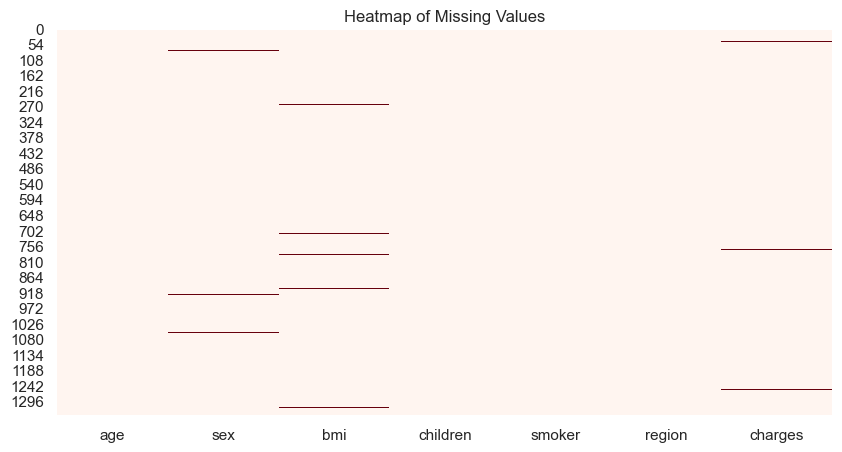

In [6]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds")
plt.title("Heatmap of Missing Values")
plt.show()

Missing Value Percentage by Column:
 sex        0.971599
bmi        0.971599
charges    0.971599
dtype: float64


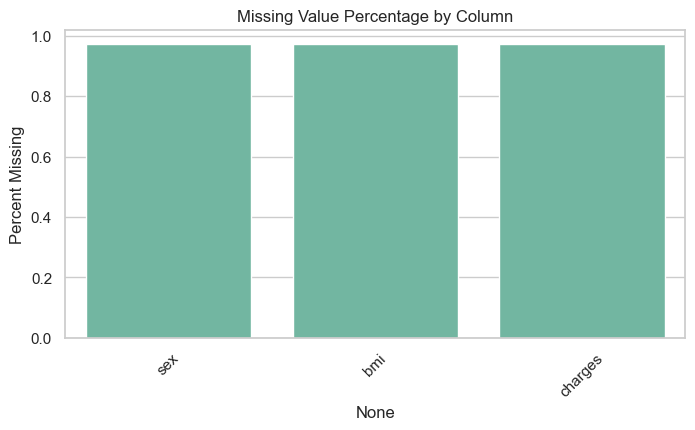

In [7]:
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
missing_percent = missing_percent[missing_percent > 0]
print("Missing Value Percentage by Column:\n", missing_percent)

plt.figure(figsize=(8,4))
sns.barplot(x=missing_percent.index, y=missing_percent.values)
plt.title("Missing Value Percentage by Column")
plt.ylabel("Percent Missing")
plt.xticks(rotation=45)
plt.show()

In [8]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)
df['charges'].fillna(df['charges'].median(), inplace=True)
df['sex'].fillna(df['sex'].mode()[0], inplace=True)
print("Null values handled?", df.isnull().sum().sum() == 0)

Null values handled? True


C:\Users\Asus Vivobook 15\AppData\Local\Temp\ipykernel_4228\2785066151.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)
C:\Users\Asus Vivobook 15\AppData\Local\Temp\ipykernel_4228\2785066151.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

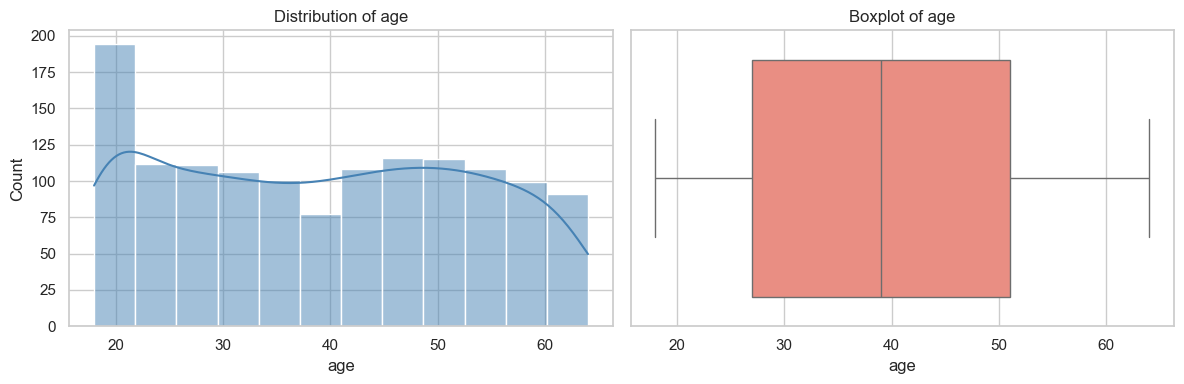

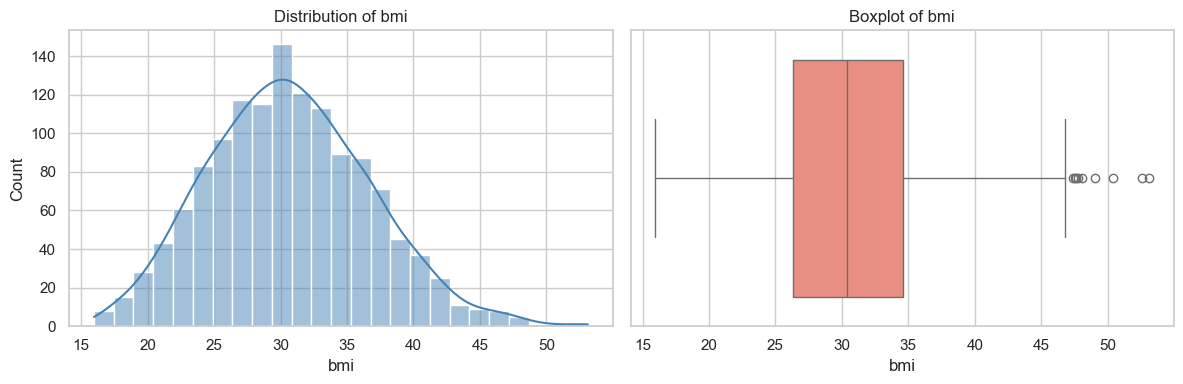

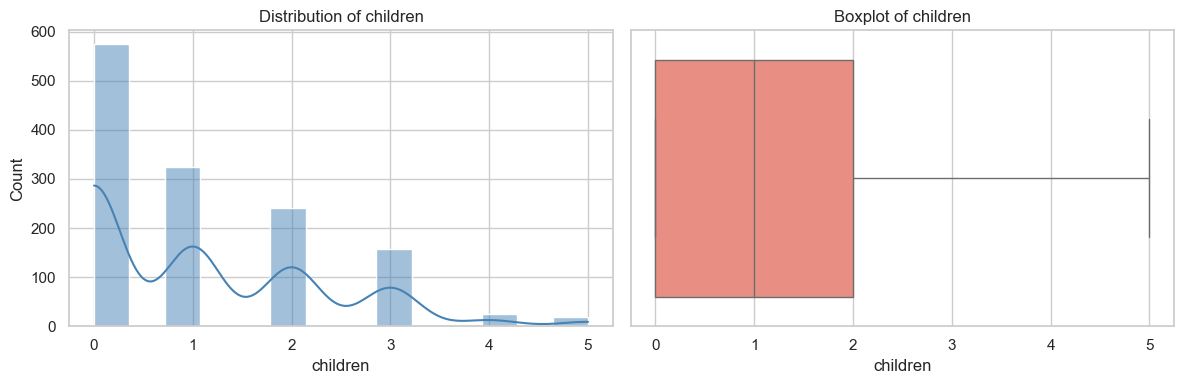

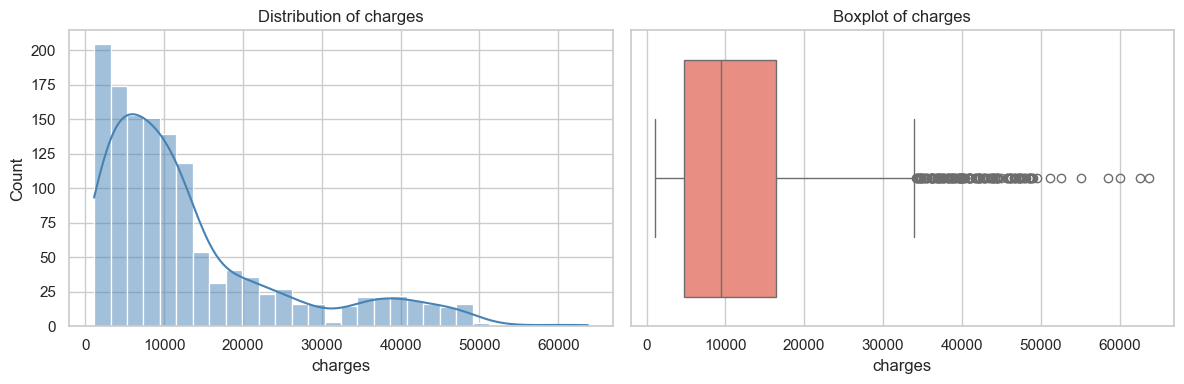

In [9]:
# Univariate Analysis
# A) Numerical Columns

numeric_cols = ['age', 'bmi', 'children', 'charges']

for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(df[col], kde=True, ax=axes[0], color='steelblue')
    axes[0].set_title(f"Distribution of {col}")

    sns.boxplot(x=df[col], ax=axes[1], color='salmon')
    axes[1].set_title(f"Boxplot of {col}")
    
    plt.tight_layout()
    plt.show()

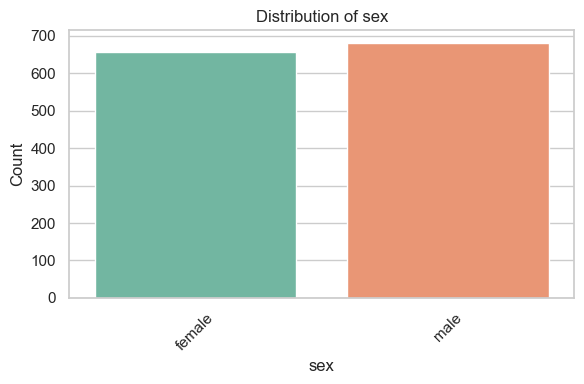

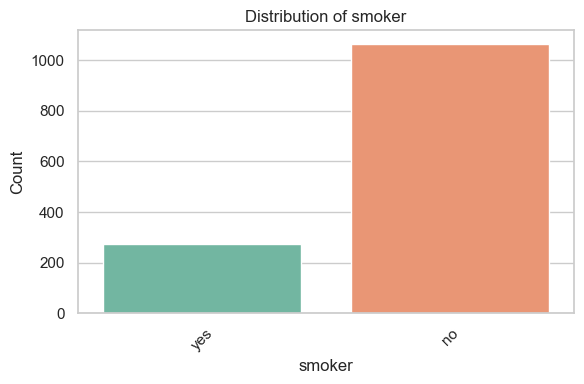

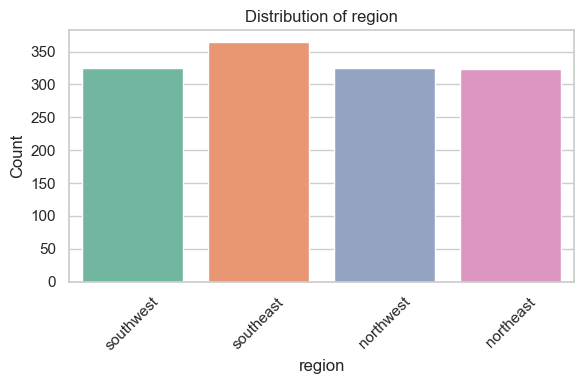

In [10]:
# B) Categorical Columns
categorical_cols = ['sex', 'smoker', 'region']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue=col, data=df, palette='Set2', legend=False)
    plt.title(f"Distribution of {col}")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

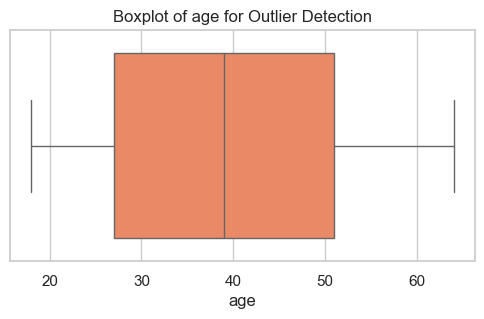

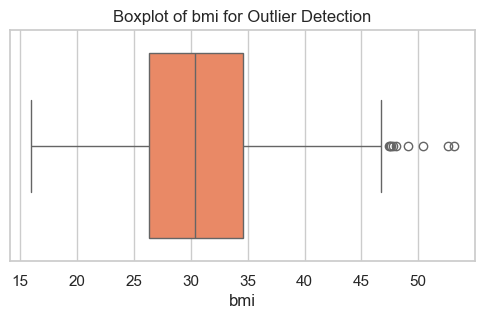

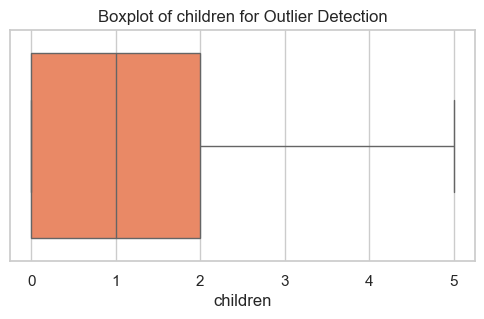

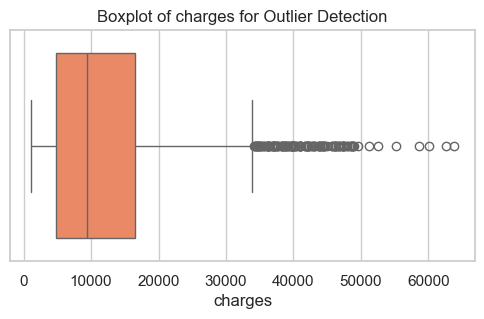

In [11]:
# Visual Outlier Detection

# A) Boxplots for Numerical Columns

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col], color='coral')
    plt.title(f"Boxplot of {col} for Outlier Detection")
    plt.show()

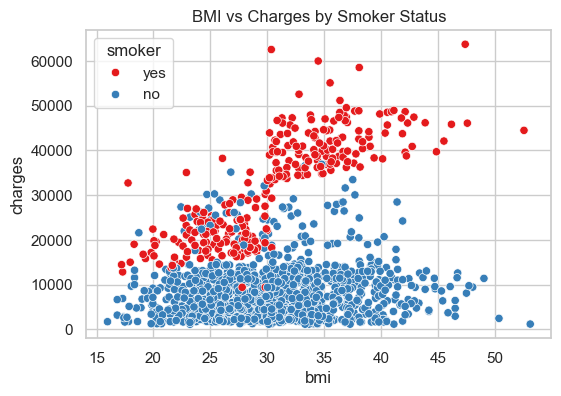

In [12]:
# b) Charges v/s BMI (Scatter Plot to visualize high-charge anomalies)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', palette='Set1')
plt.title("BMI vs Charges by Smoker Status")
plt.show()

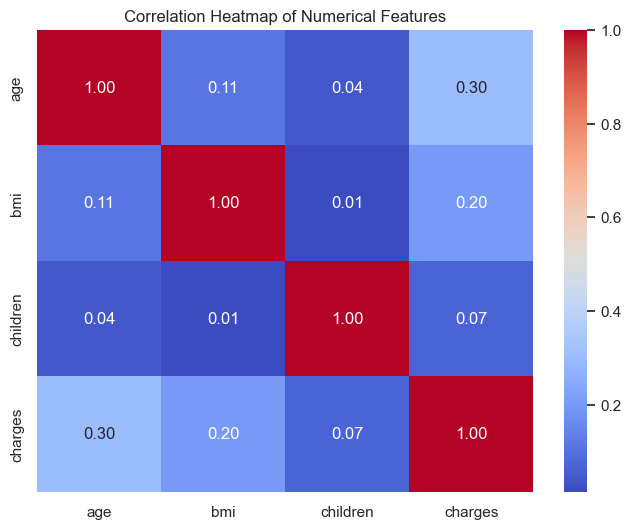

In [13]:
# Bivariate and Multivariate Analysis

# A) Correlation Heatmap (Numerical Columns)
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

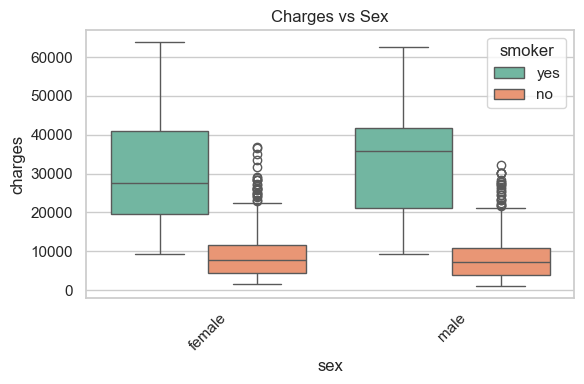

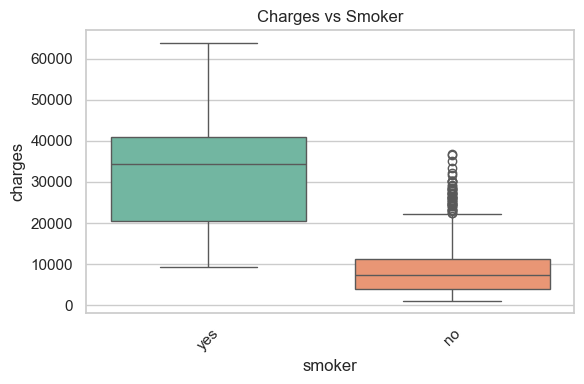

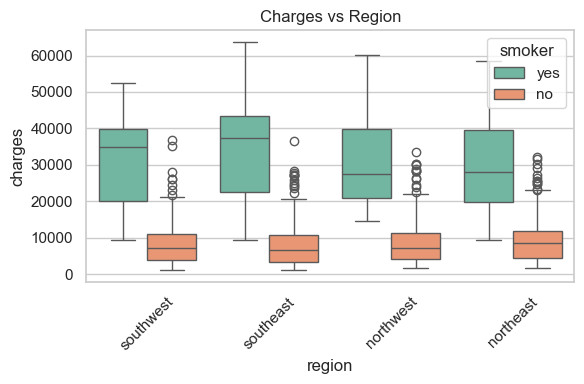

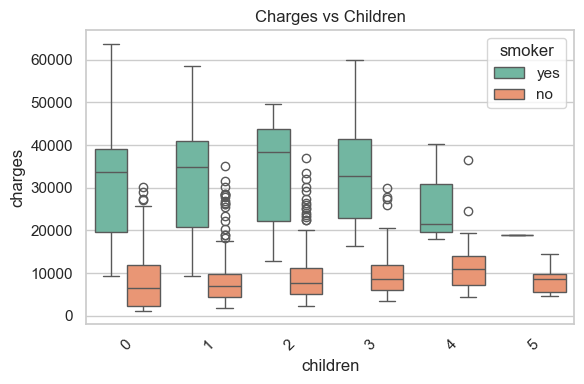

In [14]:
# B) Charges vs Categorical Features

cat_cols = ['sex', 'smoker', 'region', 'children']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=col, y='charges', data=df, palette='Set2', hue='smoker')
    plt.title(f"Charges vs {col.capitalize()}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

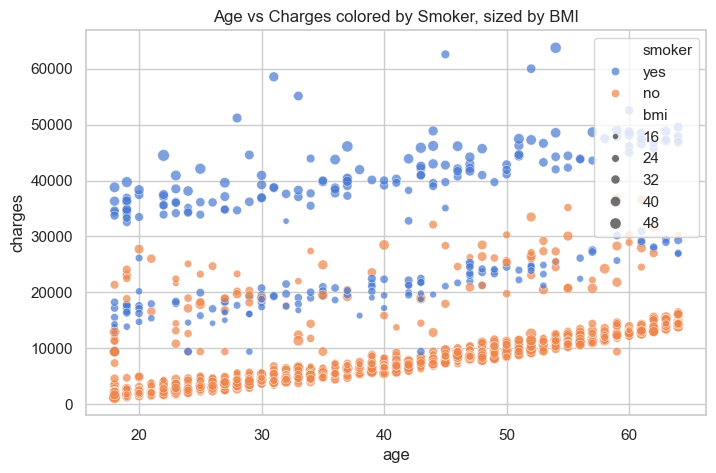

In [15]:
# Charges vs Age + Smoker + BMI (Scatter Plot)
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', size='bmi', palette='muted', alpha=0.7)
plt.title("Age vs Charges colored by Smoker, sized by BMI")
plt.show()

In [16]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(bmi_category)


def age_group(age):
    if age < 30:
        return 'Young Adult'
    elif age < 45:
        return 'Adult'
    elif age < 60:
        return 'Middle Aged'
    else:
        return 'Senior'

df['age_group'] = df['age'].apply(age_group)

C:\Users\Asus Vivobook 15\AppData\Local\Temp\ipykernel_4228\2387196710.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bmi_category', y='charges', data=df, palette='coolwarm')


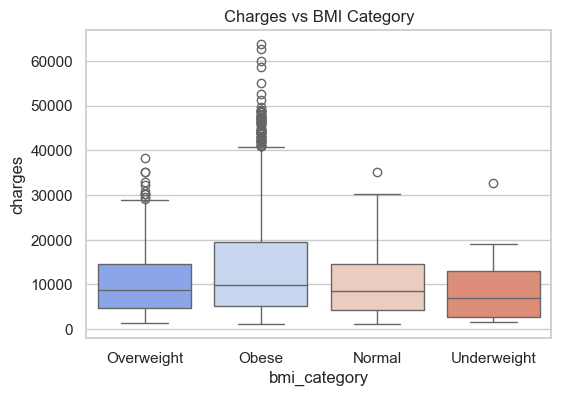

In [17]:
# Visualizing the New Categorical Features

# A) Charges vs BMI Category
plt.figure(figsize=(6,4))
sns.boxplot(x='bmi_category', y='charges', data=df, palette='coolwarm')
plt.title("Charges vs BMI Category")
plt.show()

C:\Users\Asus Vivobook 15\AppData\Local\Temp\ipykernel_4228\2978558578.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='charges', data=df, palette='Set3')


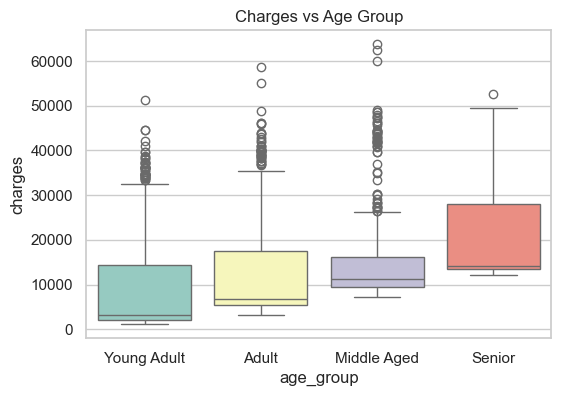

In [18]:
# B) Age Group vs Charges
plt.figure(figsize=(6,4))
sns.boxplot(x='age_group', y='charges', data=df, palette='Set3')
plt.title("Charges vs Age Group")
plt.show()